In [1]:
from preprocess import Preprocess_with_bert
from run import Detect_hate_comments
import warnings
warnings.filterwarnings('ignore')

In [2]:
target = ['hate', 'contain_gender_bias']
model_name = ['bert-base-multilingual-cased', 'kykim/bert-kor-base']
dir_path = ['bert-ckpt', 'kor-bert-ckpt']

# 악성 댓글 탐지 with Bert-base-multilingual

In [3]:
detect = Detect_hate_comments(target=target[0], 
                              model_name=model_name[0], 
                              dir_path=dir_path[0])

100%|███████████████████████████████████████| 974/974 [00:00<00:00, 6311.52it/s]
2022-04-08 18:30:55.001623: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-08 18:30:55.001770: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Max


Some layers from the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


PRE-TRAINED MODEL LOAD COMPLETES!


In [6]:
detect.train_model(epochs=2, batch_size=128)

Epoch 1/2


2022-04-08 18:31:41.611940: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


62/62 [==============================] - ETA: 0s - loss: 0.5636 - accuracy: 0.7087

2022-04-08 18:32:42.658706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.74522, saving model to ./hate/bert-base-multilingual-cased/cp.ckpt
62/62 [==============================] - 77s 1s/step - loss: 0.5636 - accuracy: 0.7087 - val_loss: 0.5038 - val_accuracy: 0.7452
Epoch 2/2
62/62 [==============================] - ETA: 0s - loss: 0.4530 - accuracy: 0.7928
Epoch 2: val_accuracy did not improve from 0.74522
62/62 [==============================] - 56s 883ms/step - loss: 0.4530 - accuracy: 0.7928 - val_loss: 0.5825 - val_accuracy: 0.7240


In [7]:
detect.test_model(batch_size=128)

2022-04-08 18:33:50.752095: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


,comments,hate_prediction
0,ㅋㅋㅋㅋ 그래도 조아해주는 팬들 많아서 좋겠다 ㅠㅠ 니들은 온유가 안만져줌 ㅠㅠ,1
1,둘다 넘 좋다~행복하세요,0
2,근데 만원이하는 현금결제만 하라고 써놓은집 우리나라에 엄청 많은데,1
3,원곡생각하나도 안나고 러블리즈 신곡나온줄!!! 너무 예쁘게 잘봤어요,0
4,장현승 얘도 참 이젠 짠하다...,0
...,...,...
969,대박 게스트... 꼭 봐야징~ 컨셉이 바뀌니깐 재미지넹,0
970,성형으로 다 뜯어고쳐놓고 예쁜척. 성형 전 니 얼굴 다 알고있다. 순자처럼 된장냄새...,1
971,분위기는 비슷하다만 전혀다른 전개던데 무슨ㅋㅋㄱ 우리나라사람들은 분위기만 비슷하면 ...,1
972,입에 손가릭이 10개 있으니 징그럽다,1


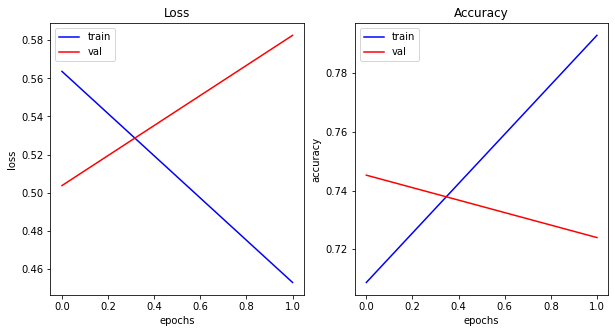

In [8]:
detect.plot_history()

# 악성 댓글 탐지 with kyKim/Bert-kor

In [ ]:
detect_ = Detect_hate_comments(target=target[0], 
                               model_name=model_name[1], 
                               dir_path=dir_path[1])
detect_.train_model(epochs=10, batch_size=128)

Downloading:   0%|          | 0.00/336k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/80.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/725 [00:00<?, ?B/s]

100%|███████████████████████████████████████| 974/974 [00:00<00:00, 6775.61it/s]


Downloading:   0%|          | 0.00/452M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertModel.

All the layers of TFBertModel were initialized from the model checkpoint at kykim/bert-kor-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/10


2022-04-08 18:34:36.534787: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


62/62 [==============================] - ETA: 0s - loss: 0.6467 - accuracy: 0.6401

2022-04-08 18:35:44.244915: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.69851, saving model to ./hate/kykim/bert-kor-base/cp.ckpt
62/62 [==============================] - 82s 1s/step - loss: 0.6467 - accuracy: 0.6401 - val_loss: 0.5569 - val_accuracy: 0.6985
Epoch 2/10
62/62 [==============================] - ETA: 0s - loss: 0.5070 - accuracy: 0.7467
Epoch 2: val_accuracy improved from 0.69851 to 0.74735, saving model to ./hate/kykim/bert-kor-base/cp.ckpt
62/62 [==============================] - 58s 923ms/step - loss: 0.5070 - accuracy: 0.7467 - val_loss: 0.4750 - val_accuracy: 0.7473
Epoch 3/10
62/62 [==============================] - ETA: 0s - loss: 0.4237 - accuracy: 0.7994
Epoch 3: val_accuracy did not improve from 0.74735
62/62 [==============================] - 60s 957ms/step - loss: 0.4237 - accuracy: 0.7994 - val_loss: 0.5835 - val_accuracy: 0.7219
Epoch 4/10
62/62 [==============================] - ETA: 0s - loss: 0.3202 - accuracy: 0.8620
Epoch 4: val_accuracy improved from 0.74735 to 0.76433, saving

In [ ]:
detect_.test_model(batch_size=128)

In [ ]:
detect_.plot_history()

# 성차별/혐오 댓글 탐지 with Bert-base-multilingual

In [ ]:
detect_gender = Detect_hate_comments(target=target[1], 
                                     model_name=model_name[0], 
                                     dir_path=dir_path[0])
detect_gender.train_model(epochs=10, batch_size=128)

In [ ]:
detect_gender.test_model(batch_size=128)

In [ ]:
detect_gender.plot_history()

# 성차별/혐오 댓글 탐지 with kyKim/Bert-kor

In [ ]:
detect_gender_ = Detect_hate_comments(target=target[1], 
                                      model_name=model_name[1], 
                                      dir_path=dir_path[1])
detect_gender_.train_model(epochs=10, batch_size=128)

In [ ]:
detect_gender_.test_model(batch_size=128)

In [ ]:
detect_gender_.plot_history()